<a href="https://colab.research.google.com/github/tekassh1/AI-Systems/blob/main/Lab4_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

plt.rcdefaults()
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/WineDataset.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


          Alcohol  Malic Acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.0

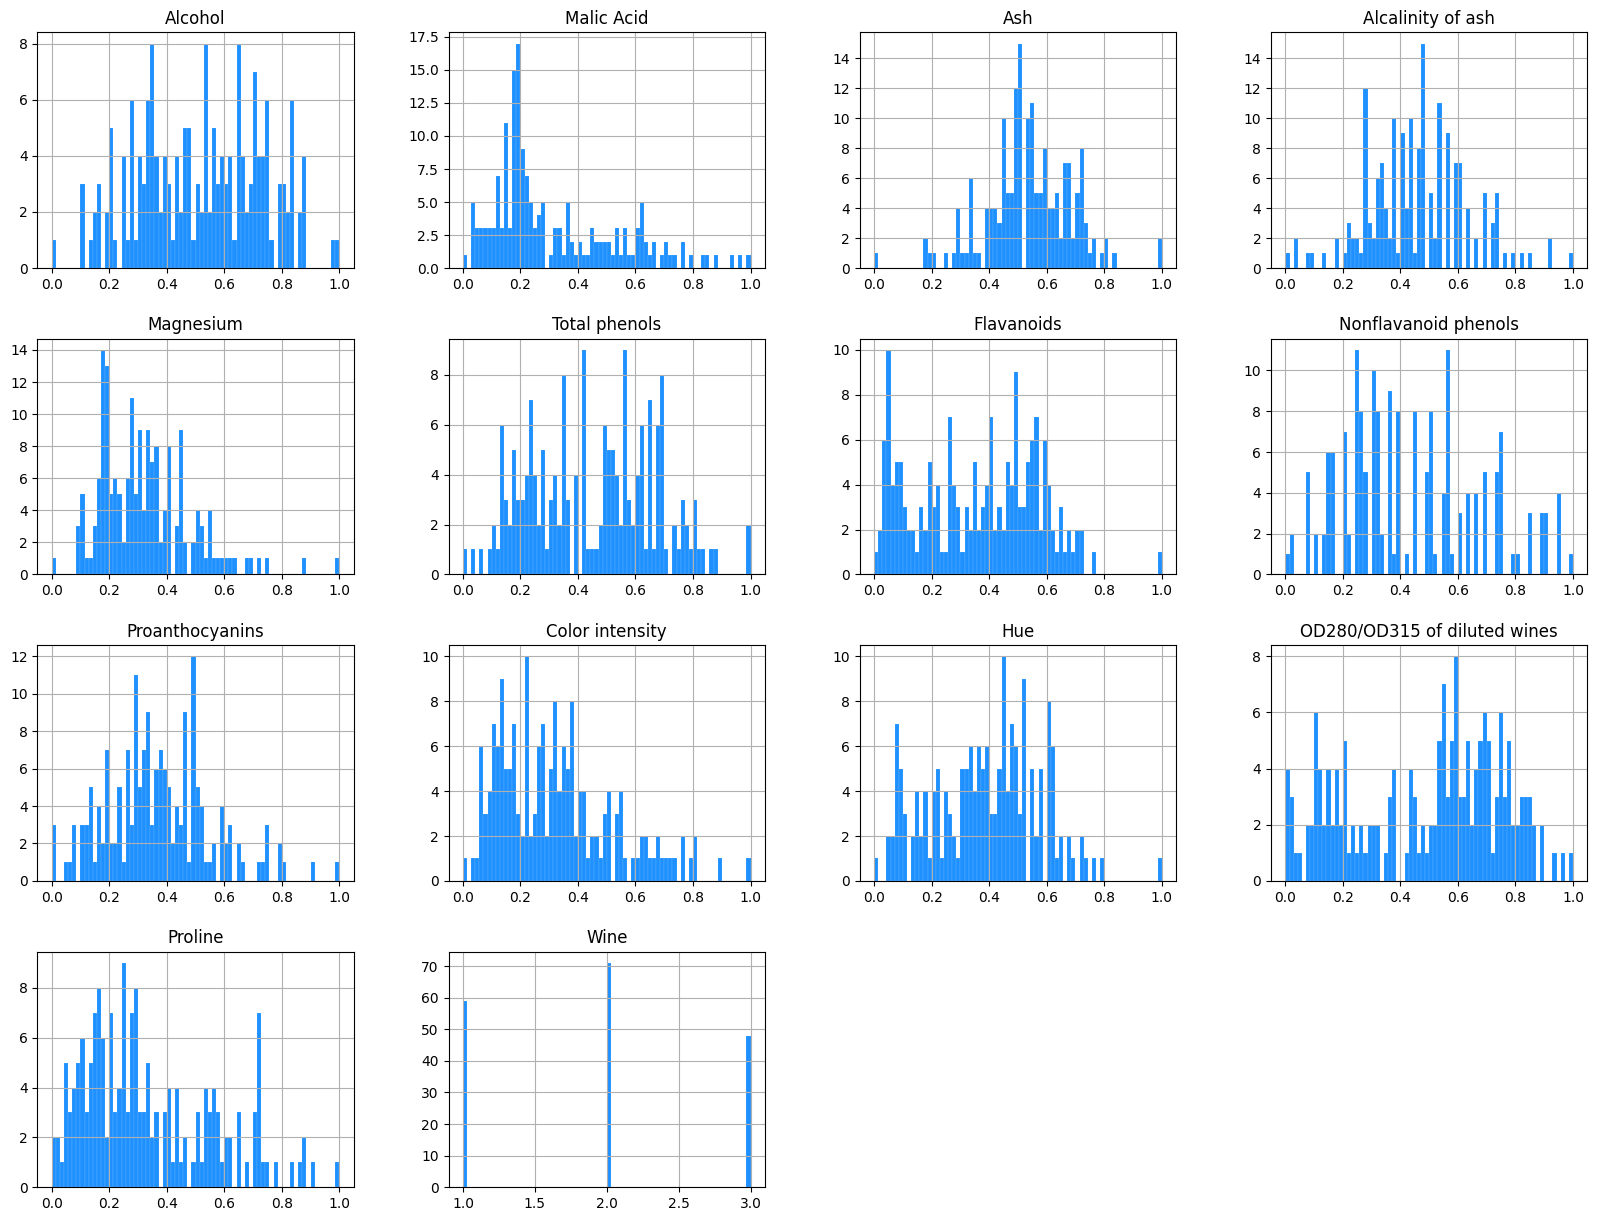

In [193]:
#Preparing data
df = df.dropna()
wine_col = df[["Wine"]]
df = df.drop(columns=["Wine"])
df = (df - df.min()) / (df.max() - df.min())
df["Wine"] = wine_col

print(df.describe())
df.hist(bins=70, figsize=(20, 15), color='dodgerblue', ec='white', linewidth=0.08)
plt.show()

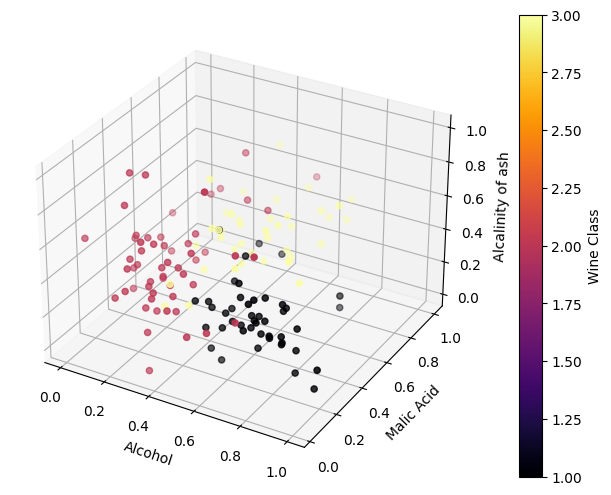

In [194]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Select attributes

# First set - [Alcohol, Malic Acid, Alcalinity of ash]
first_set_train = train_df[["Alcohol", "Malic Acid", "Alcalinity of ash", "Wine"]]
first_set_test = test_df[["Alcohol", "Malic Acid", "Alcalinity of ash", "Wine"]]

# Second set - random
columns_to_sample = train_df.columns[:-1]
column_names = columns_to_sample.to_series().sample(3)
column_names = column_names.tolist() + ['Wine']

second_set_train = train_df[column_names]
second_set_test = test_df[column_names]

# Print first set 3D vidualization
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(train_df['Alcohol'], train_df['Malic Acid'], train_df['Alcalinity of ash'], c = train_df['Wine'], cmap='inferno')

plt.colorbar(sc, label='Wine Class')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Alcalinity of ash')

plt.show()

Признаки выбраные вручную: [Alcohol, Malic Acid, Alcalinity of ash]
Признаки выбранные случайно:  ['Magnesium', 'Color intensity', 'Total phenols']





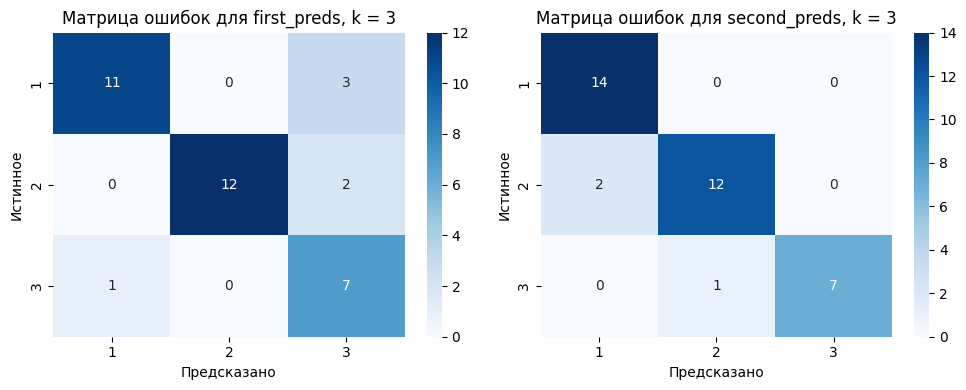

Точность модели с признаками отобранными вручную:  0.8333333333333334
Точность модели с признаками отобранными случайным образом:  0.9166666666666666


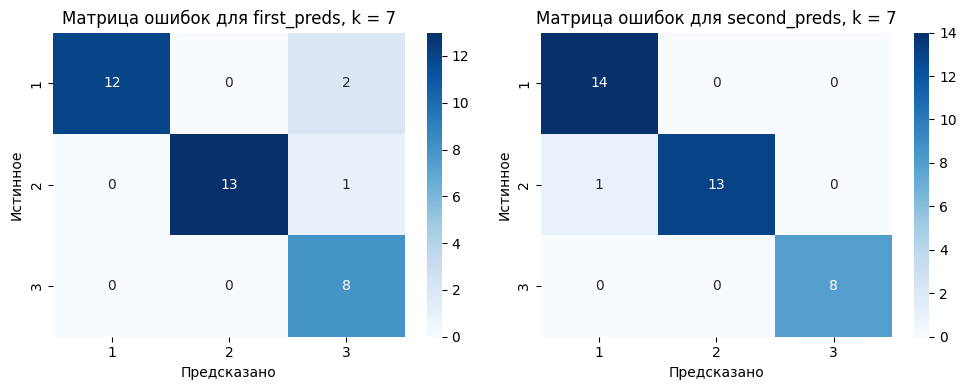

Точность модели с признаками отобранными вручную:  0.9166666666666666
Точность модели с признаками отобранными случайным образом:  0.9722222222222222


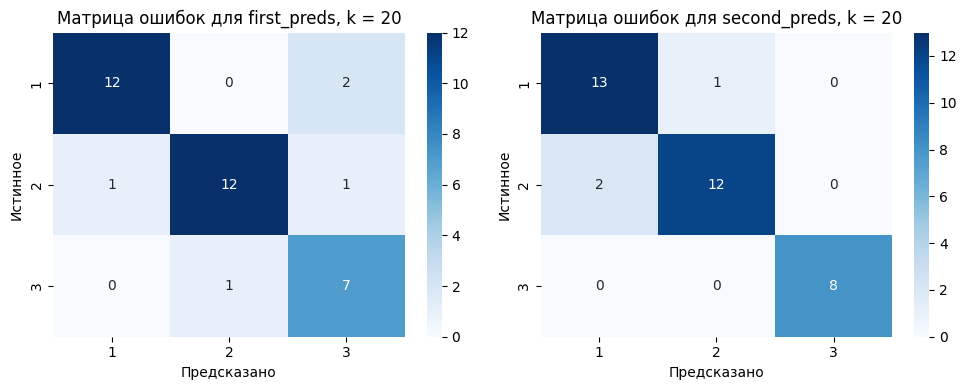

Точность модели с признаками отобранными вручную:  0.8611111111111112
Точность модели с признаками отобранными случайным образом:  0.9166666666666666


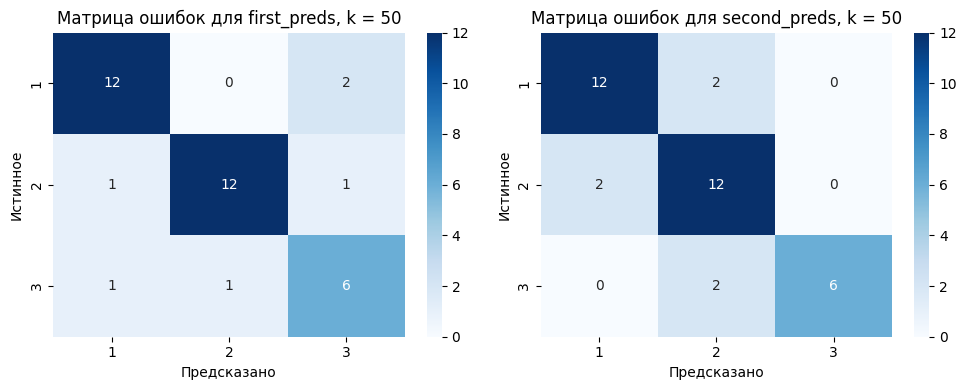

Точность модели с признаками отобранными вручную:  0.8333333333333334
Точность модели с признаками отобранными случайным образом:  0.8333333333333334


In [195]:
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def select_popular_class(df, distances, k):
    distances_idxs = [int(distance[1]) for distance in distances]
    return df.iloc[distances_idxs]["Wine"].value_counts().idxmax()

def predict_kNN(train_df, test_df, k):
    predictions = []

    # remove "Wine"
    train_attrs = train_df.drop(train_df.columns[-1], axis=1).to_numpy()
    test_attrs = test_df.drop(test_df.columns[-1], axis=1).to_numpy()

    for test_row in test_attrs:
        distances = []
        for i in range(0, len(train_attrs)):
            distances.append([euclidean_distance(test_row, train_attrs[i]), i])
        distances = sorted(distances)
        predictions.append(select_popular_class(train_df, distances[:k], k))

    return predictions

# Матрица ошибок
def print_result(true_vals, first_preds, second_preds):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Признаки выбранные вручную
    cm1 = confusion_matrix(true_vals, first_preds)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3], ax=axes[0])
    axes[0].set_xlabel('Предсказано')
    axes[0].set_ylabel('Истинное')
    axes[0].set_title('Матрица ошибок для first_preds, k = ' + str(k_val))

    # Признаки выбранные случайным образом
    cm2 = confusion_matrix(true_vals, second_preds)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3], ax=axes[1])
    axes[1].set_xlabel('Предсказано')
    axes[1].set_ylabel('Истинное')
    axes[1].set_title('Матрица ошибок для second_preds, k = ' + str(k_val))

    plt.tight_layout()
    plt.show()

    print("Точность модели с признаками отобранными вручную: ", get_model_accuracy(cm1))
    print("Точность модели с признаками отобранными случайным образом: ", get_model_accuracy(cm2))

def get_model_accuracy(confusion_matrix):
    return np.trace(confusion_matrix) / np.sum(confusion_matrix)

true_vals = first_set_test["Wine"].to_numpy()

print("Признаки выбраные вручную: [Alcohol, Malic Acid, Alcalinity of ash]")
print("Признаки выбранные случайно: ", second_set_train.columns.tolist()[:-1])
print("\n\n")

k_vals = [3, 7, 20, 50]

for k_val in k_vals:
    first_preds = predict_kNN(first_set_train, first_set_test, k_val)
    second_preds = predict_kNN(second_set_train, second_set_test, k_val)

    print_result(true_vals, first_preds, second_preds)